In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MEDV')

In [3]:
# Transform the data
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the transformed data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

C:\Users\sans5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sans5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sans5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sans5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

In [4]:
# Train the model
lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = lr_poly.predict(X_test)

In [5]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial): {mse_poly}')

Mean Squared Error (Polynomial): 0.4643015255333747


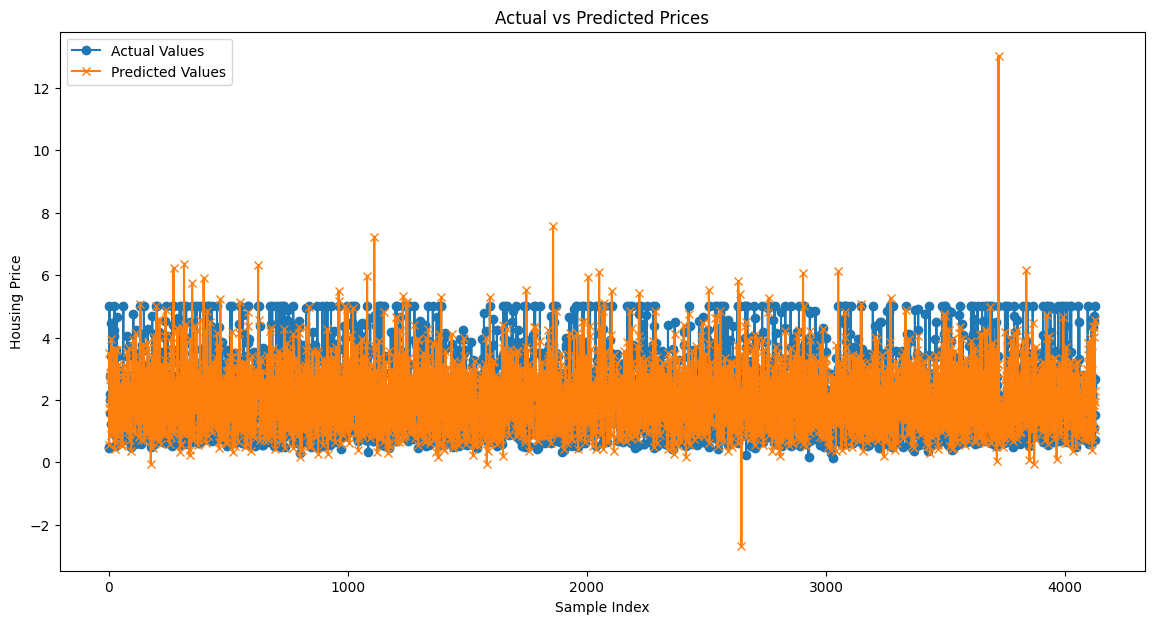

In [6]:
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred_poly, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Housing Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()